# Practice 8 - k-Means and Hierarchical Clustering

We will work again on the iris data set. The data have labels here, but we will check if unsupervised learning can make good guesses.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.cluster import KMeans

In [28]:
dataset = pd.read_csv('iris.csv')

*This small dataset from 1936 is often used for testing out machine learning algorithms and visualizations. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.*

In [29]:
dataset.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,setosa
145,6.7,3.0,5.2,2.3,virginica
17,5.1,3.5,1.4,0.3,setosa
39,5.1,3.4,1.5,0.2,setosa
111,6.4,2.7,5.3,1.9,virginica


## Your Task

* Plot **sepal width** vs. **sepal length** with colors corresponding to the species
* Train a k-Means model for 3 clusters and plot the results
* Train a Hierarchical Clustering model for 3 clusters and plot the results
* Do again the first three steps now with **petal width** vs. **petal length**
* Visually, which 2D plane seems to be the most convenient for clustering?

## Suggestion of correction

### Plot **sepal width** vs. **sepal length** with colors corresponding to the species

In [30]:
# Define feature 1 and feature 2
feature_x = 'sepal_length'
feature_y = 'sepal_width'

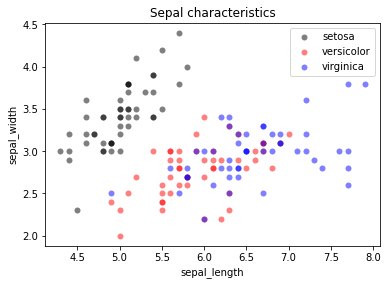

In [31]:
fig = plt.figure(figsize=(6,6))

# Loop on the species
for i, species in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==species][feature_x], dataset[dataset['species']==species][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = species)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a k-Means model for 3 clusters and plot the results

**Prepare the predictors:**

In [32]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,sepal_length,sepal_width
136,6.3,3.4
92,5.8,2.6
68,6.2,2.2
42,4.4,3.2
114,5.8,2.8
25,5.0,3.0


**Feature scaling:**

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**K-means clustering:**

In [34]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [35]:
y_pred = kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 2 0 2 2
 0 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**Plot the results:**

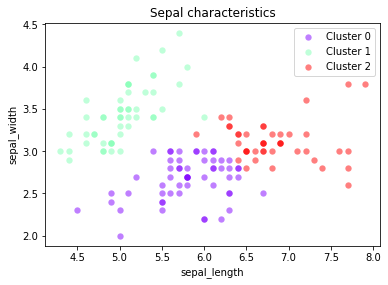

In [36]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

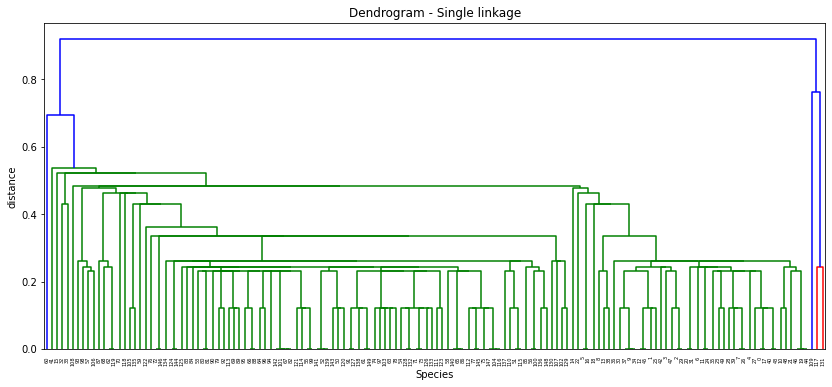

In [37]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

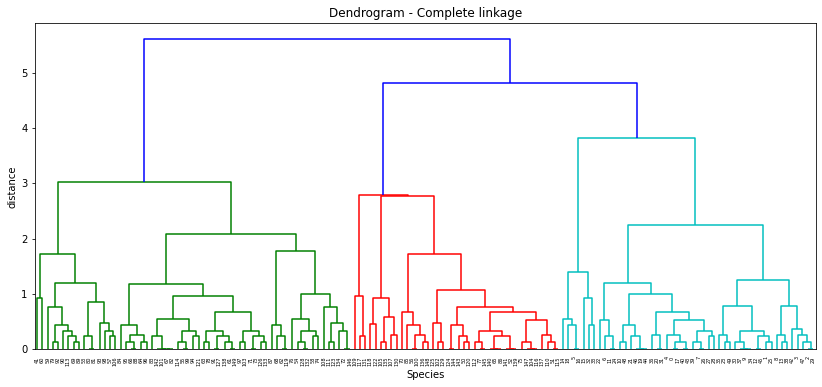

In [38]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

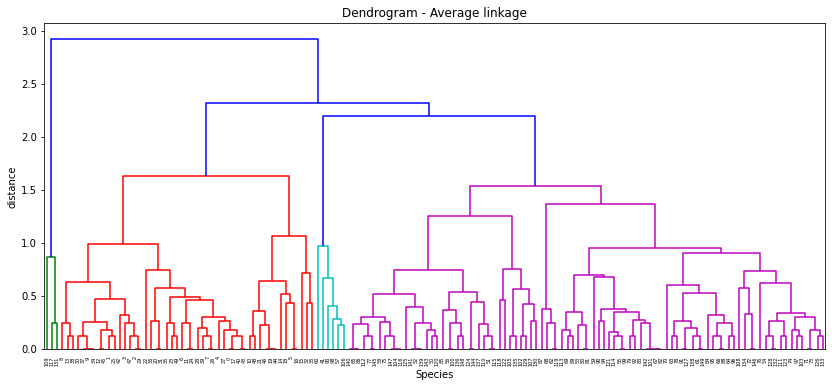

In [39]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

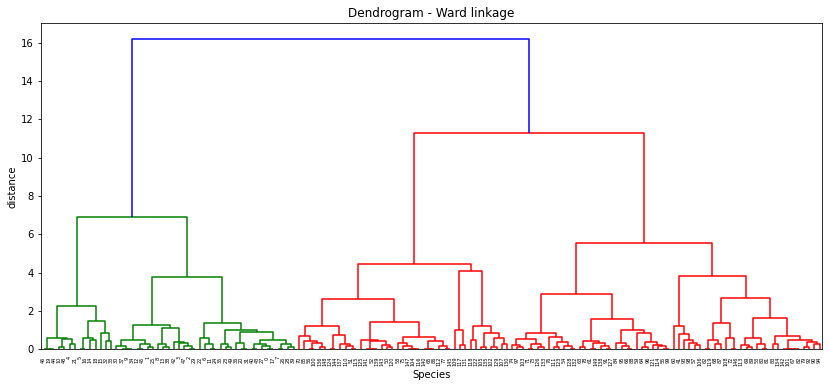

In [40]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

**Hierarchical clustering:**

Let's apply the hierarchical clustering with complete and ward linkages.

In [41]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')

**Plot the results:**

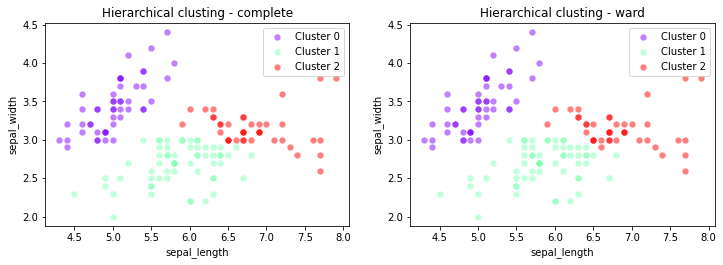

In [42]:
fig, axs = plt.subplots(1,2, figsize=(6*2,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clusting - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

### Do again the first three steps now with **petal width** vs. **petal length**

In [43]:
# Define feature 1 and feature 2
feature_x = 'petal_length'
feature_y = 'petal_width'

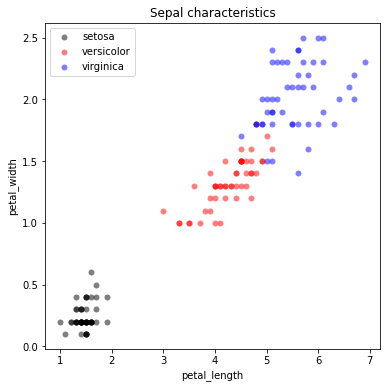

In [44]:
fig = plt.figure(figsize=(6,6))
       
# Loop on the species
for i, species in enumerate(dataset['species'].unique()):
    # Plot feature 1 vs. feature 2
    plt.scatter(dataset[dataset['species']==species][feature_x], dataset[dataset['species']==species][feature_y], color = ['black', 'red', 'blue'][i], alpha=0.5, lw=0, label = species)

# Figure style
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
# plt.axis('scaled')

plt.show()

**Prepare the predictors:**

In [45]:
X = dataset[[feature_x, feature_y]]
X.sample(n=6)

,petal_length,petal_width
95,4.2,1.2
46,1.6,0.2
14,1.2,0.2
36,1.3,0.2
24,1.9,0.2
86,4.7,1.5


**Feature scaling:**

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)

**K-mean clustering:**

In [47]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [48]:
y_pred = kmeans.predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


**Plot the results:**

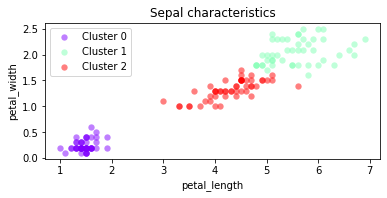

In [49]:
fig = plt.figure(figsize=(6,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.axis('scaled')

plt.show()

### Train a Hierarchical Clustering model for 3 clusters and plot the results

**Dendograms:**

Let's first check the dendograms with different linkage methods.

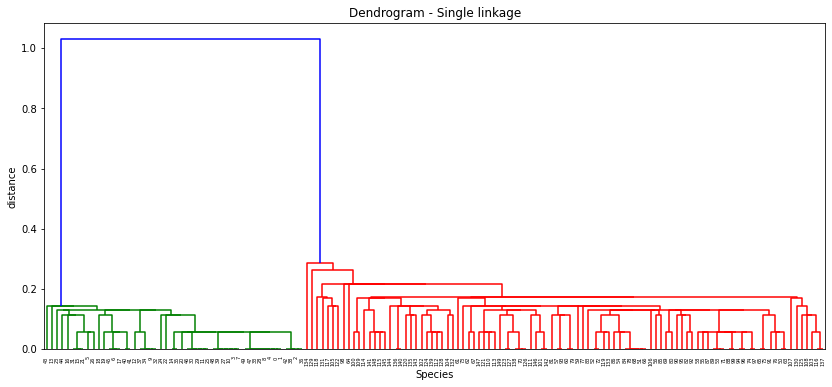

In [50]:
from scipy.cluster import hierarchy
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'single'))
plt.title('Dendrogram - Single linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

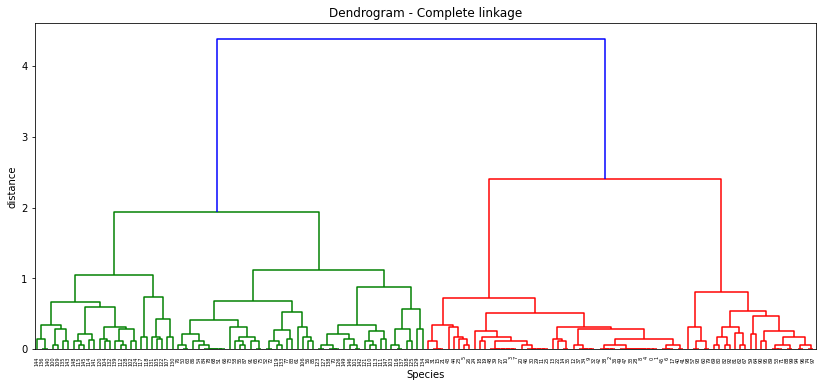

In [51]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'complete'))
plt.title('Dendrogram - Complete linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

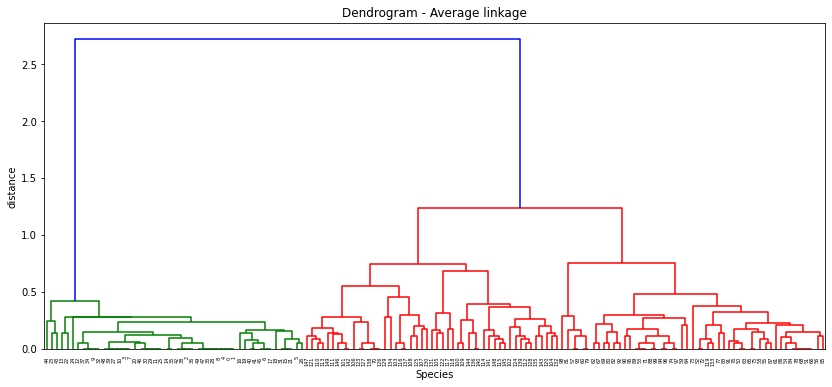

In [52]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'average'))
plt.title('Dendrogram - Average linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

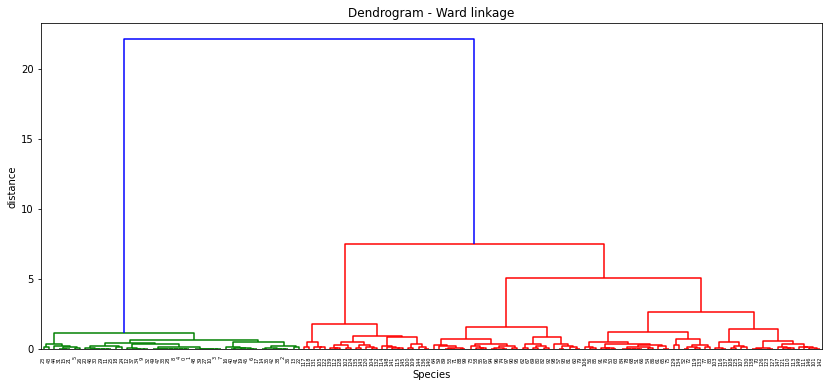

In [53]:
plt.figure(figsize=(14,6))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = 'ward'))
plt.title('Dendrogram - Ward linkage')
plt.xlabel('Species')
plt.ylabel('distance')
plt.show()

**Hierarchical clustering:**

Ward and Average linkages seem the best. Potentially also Complete linkage.   
Let's apply all three linkages to see.

In [54]:
from sklearn.cluster import AgglomerativeClustering

hc_1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
hc_2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
hc_3 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')

**Plot the results:**

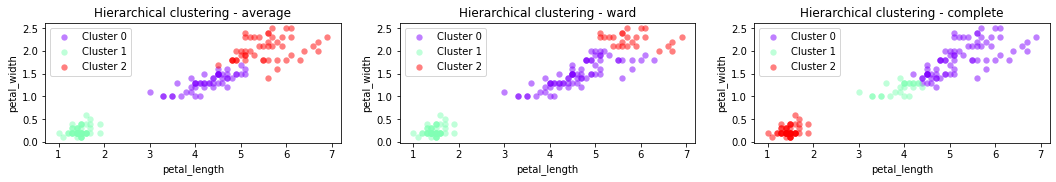

In [55]:
fig, axs = plt.subplots(1,3, figsize=(6*3,6))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)

# Loop on each linkage method
for i_method, hc_i in enumerate([hc_1, hc_2, hc_3]):
    y_pred_i = hc_i.fit_predict(X)
    linkage_i = hc_i.linkage
    
    # Plot data points with color corresponding to their cluster attribution
    for i in range(k):
        axs[i_method].scatter(dataset[y_pred_i == i][feature_x], dataset[y_pred_i == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))
        axs[i_method].set_title('Hierarchical clustering - ' + linkage_i)
        axs[i_method].set_xlabel(feature_x)
        axs[i_method].set_ylabel(feature_y)
        axs[i_method].legend()
        axs[i_method].axis('scaled')
    
plt.show()

Here, average linkage gives clusters that are the closest to the real categories.

### Visually, which 2D plane seems to be the most convenient for clustering?

Visually, the plane sepal_length/sepal_width is more subject to class interlacing whereas the plane petal_length/petal_width offers more class separation. This latter plane has shown to give better results for computing a clustering that reflect the real iris species.

### Extension: Clustering in 4 dimensions

In [56]:
X = dataset.drop('species', axis=1)
X.sample(n=6)

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
57,4.9,2.4,3.3,1.0
43,5.0,3.5,1.6,0.6
18,5.7,3.8,1.7,0.3
1,4.9,3.0,1.4,0.2
137,6.4,3.1,5.5,1.8


In [57]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [58]:
k = 3

kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [59]:
# Define feature 1 and feature 2 (for the visualization only)
feature_x = 'sepal_length'
feature_y = 'sepal_width'
# feature_x = 'petal_length'
# feature_y = 'petal_width'

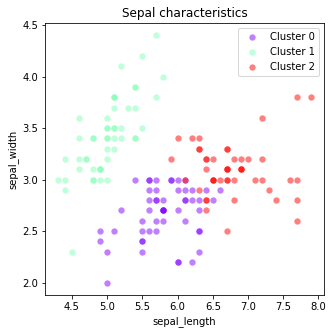

In [60]:
fig = plt.figure(figsize=(5,5))

# Prepare a list of colors
color_list = plt.cm.get_cmap('rainbow', k)
  
# Plot data points with color corresponding to their cluster attribution
for i in range(k):
    plt.scatter(dataset[y_pred == i][feature_x], dataset[y_pred == i][feature_y], s = 40, color=color_list(i), alpha=0.5, lw=0, label='Cluster '+str(i))

    
plt.title('Sepal characteristics')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()